In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import re
import datetime
import dateutil.parser
import statistics 


In [2]:
df = pd.read_csv('football_data.csv')

In [3]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
df.isna()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [21]:
a.index

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [22]:
for x,y in zip(a.index,a):
    print(x,y)

Unnamed: 0 0
ID 0
Name 0
Age 0
Photo 0
Nationality 0
Flag 0
Overall 0
Potential 0
Club 241
Club Logo 0
Value 0
Wage 0
Special 0
Preferred Foot 48
International Reputation 48
Weak Foot 48
Skill Moves 48
Work Rate 48
Body Type 48
Real Face 48
Position 60
Jersey Number 60
Joined 1553
Loaned From 16943
Contract Valid Until 289
Height 48
Weight 48
LS 2085
ST 2085
RS 2085
LW 2085
LF 2085
CF 2085
RF 2085
RW 2085
LAM 2085
CAM 2085
RAM 2085
LM 2085
LCM 2085
CM 2085
RCM 2085
RM 2085
LWB 2085
LDM 2085
CDM 2085
RDM 2085
RWB 2085
LB 2085
LCB 2085
CB 2085
RCB 2085
RB 2085
Crossing 48
Finishing 48
HeadingAccuracy 48
ShortPassing 48
Volleys 48
Dribbling 48
Curve 48
FKAccuracy 48
LongPassing 48
BallControl 48
Acceleration 48
SprintSpeed 48
Agility 48
Reactions 48
Balance 48
ShotPower 48
Jumping 48
Stamina 48
Strength 48
LongShots 48
Aggression 48
Interceptions 48
Positioning 48
Vision 48
Penalties 48
Composure 48
Marking 48
StandingTackle 48
SlidingTackle 48
GKDiving 48
GKHandling 48
GKKicking 48
GKPos

In [19]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [24]:
df['RAM']

0        93+2
1        88+3
2        89+3
3         NaN
4        88+3
         ... 
18202    45+2
18203    40+2
18204    44+2
18205    45+2
18206    45+2
Name: RAM, Length: 18207, dtype: object

In [26]:
df.index[df['Height'].isna()]

Int64Index([13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244,
            13245, 13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253,
            13254, 13255, 13256, 13257, 13258, 13259, 13260, 13261, 13262,
            13263, 13264, 13265, 13266, 13267, 13268, 13269, 13270, 13271,
            13272, 13273, 13274, 13275, 13276, 13277, 13278, 13279, 13280,
            13281, 13282, 13283],
           dtype='int64')

In [28]:
df.index[df['Weight'].isna()] == df.index[df['LongShots'].isna()]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [32]:
df['Nationality']

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

In [43]:
nations = df['Nationality'].unique().tolist()

In [44]:
nations

['Argentina',
 'Portugal',
 'Brazil',
 'Spain',
 'Belgium',
 'Croatia',
 'Uruguay',
 'Slovenia',
 'Poland',
 'Germany',
 'France',
 'England',
 'Italy',
 'Egypt',
 'Colombia',
 'Denmark',
 'Gabon',
 'Wales',
 'Senegal',
 'Costa Rica',
 'Slovakia',
 'Netherlands',
 'Bosnia Herzegovina',
 'Morocco',
 'Serbia',
 'Algeria',
 'Austria',
 'Greece',
 'Chile',
 'Sweden',
 'Korea Republic',
 'Finland',
 'Guinea',
 'Montenegro',
 'Armenia',
 'Switzerland',
 'Norway',
 'Czech Republic',
 'Scotland',
 'Ghana',
 'Central African Rep.',
 'DR Congo',
 'Ivory Coast',
 'Russia',
 'Ukraine',
 'Iceland',
 'Mexico',
 'Jamaica',
 'Albania',
 'Venezuela',
 'Japan',
 'Turkey',
 'Ecuador',
 'Paraguay',
 'Mali',
 'Nigeria',
 'Cameroon',
 'Dominican Republic',
 'Israel',
 'Kenya',
 'Hungary',
 'Republic of Ireland',
 'Romania',
 'United States',
 'Cape Verde',
 'Australia',
 'Peru',
 'Togo',
 'Syria',
 'Zimbabwe',
 'Angola',
 'Burkina Faso',
 'Iran',
 'Estonia',
 'Tunisia',
 'Equatorial Guinea',
 'New Zealand',

In [47]:
diction_nation = dict([])
for nation in nations:
    diction_nation[nation] = (df['Nationality'] == nation).sum()
    print(nation,diction_nation[nation])

Argentina 937
Portugal 322
Brazil 827
Spain 1072
Belgium 260
Croatia 126
Uruguay 149
Slovenia 55
Poland 350
Germany 1198
France 914
England 1662
Italy 702
Egypt 31
Colombia 618
Denmark 336
Gabon 15
Wales 129
Senegal 130
Costa Rica 30
Slovakia 54
Netherlands 453
Bosnia Herzegovina 61
Morocco 85
Serbia 126
Algeria 60
Austria 298
Greece 102
Chile 391
Sweden 397
Korea Republic 335
Finland 67
Guinea 31
Montenegro 23
Armenia 10
Switzerland 220
Norway 341
Czech Republic 100
Scotland 286
Ghana 114
Central African Rep. 3
DR Congo 52
Ivory Coast 100
Russia 79
Ukraine 73
Iceland 47
Mexico 366
Jamaica 32
Albania 40
Venezuela 67
Japan 478
Turkey 303
Ecuador 43
Paraguay 85
Mali 43
Nigeria 121
Cameroon 90
Dominican Republic 2
Israel 14
Kenya 10
Hungary 38
Republic of Ireland 368
Romania 54
United States 353
Cape Verde 19
Australia 236
Peru 37
Togo 12
Syria 9
Zimbabwe 13
Angola 15
Burkina Faso 16
Iran 17
Estonia 13
Tunisia 32
Equatorial Guinea 5
New Zealand 44
FYR Macedonia 20
United Arab Emirates 1
C

In [48]:
list_nation = list(diction_nation.items())
list_nation

[('Argentina', 937),
 ('Portugal', 322),
 ('Brazil', 827),
 ('Spain', 1072),
 ('Belgium', 260),
 ('Croatia', 126),
 ('Uruguay', 149),
 ('Slovenia', 55),
 ('Poland', 350),
 ('Germany', 1198),
 ('France', 914),
 ('England', 1662),
 ('Italy', 702),
 ('Egypt', 31),
 ('Colombia', 618),
 ('Denmark', 336),
 ('Gabon', 15),
 ('Wales', 129),
 ('Senegal', 130),
 ('Costa Rica', 30),
 ('Slovakia', 54),
 ('Netherlands', 453),
 ('Bosnia Herzegovina', 61),
 ('Morocco', 85),
 ('Serbia', 126),
 ('Algeria', 60),
 ('Austria', 298),
 ('Greece', 102),
 ('Chile', 391),
 ('Sweden', 397),
 ('Korea Republic', 335),
 ('Finland', 67),
 ('Guinea', 31),
 ('Montenegro', 23),
 ('Armenia', 10),
 ('Switzerland', 220),
 ('Norway', 341),
 ('Czech Republic', 100),
 ('Scotland', 286),
 ('Ghana', 114),
 ('Central African Rep.', 3),
 ('DR Congo', 52),
 ('Ivory Coast', 100),
 ('Russia', 79),
 ('Ukraine', 73),
 ('Iceland', 47),
 ('Mexico', 366),
 ('Jamaica', 32),
 ('Albania', 40),
 ('Venezuela', 67),
 ('Japan', 478),
 ('Turkey

In [103]:
important_nations = sorted(list_nation,key = lambda x:x[1], reverse = True)[:4]

important_nations = [ x for x,y in important_nations]
important_nations

['England', 'Germany', 'Spain', 'Argentina']

In [104]:
import seaborn as sns

In [105]:
impn_data = df[df['Nationality'].isin(important_nations)]

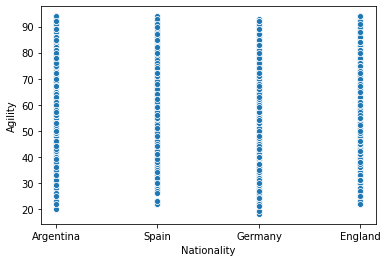

In [106]:
sns.scatterplot(data=impn_data,y = 'Agility', x='Nationality')
plt.show()

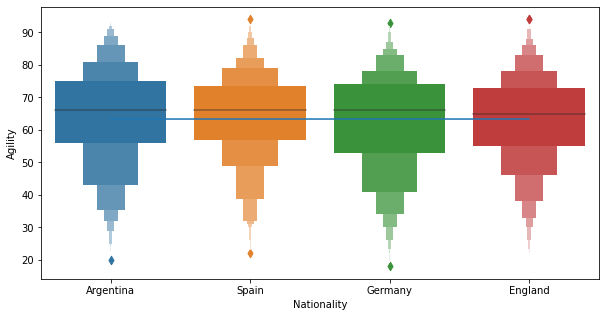

In [107]:
plt.figure(figsize=(10,5))
sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_data,y = 'Agility', x='Nationality')
plt.show()


<ipython-input-110-76afd78d5b24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impn_data['Unnamed: 0'] = impn_data.index


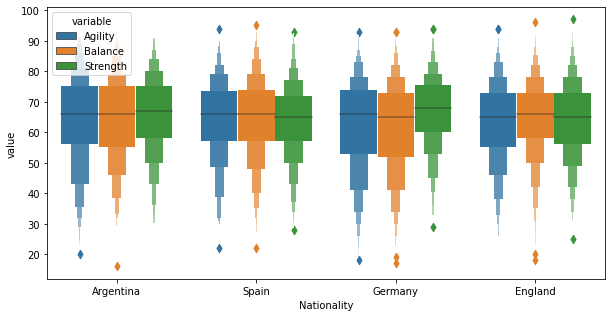

In [110]:
impn_data['Unnamed: 0'] = impn_data.index
impn_plot = impn_data.melt(id_vars='Nationality', value_vars=['Agility', 'Balance','Strength'])

plt.figure(figsize=(10,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Nationality')
plt.show()


In [77]:
df['Agility'].mean()

63.503607026818656